## Computational Chemistry for Experimentalists
## Introduction to Python, Jupyter, PySCF, and the RDKit 

Many of the worked examples in this book use Python. This notebook tests that you have PySCF and the RDKit installed and running correctly. 

This first block imports all of the necessary Python modules. If these aren't installed, this will fail. 

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from pyscf import gto,scf
import py3Dmol

This block uses PySCF to perform a molecular orbital calculation on an isolated hydrogen atom, as described in chapters 2 and 4. We print the computed hydrogen atom ionization potential (chapter 15). The exact ground-state ionization potential of hydrogen is 0.5 Hartree = 13.606 eV. Our calculation will give a slightly different answer due to the finite AO basis set (Chapter 3). 

In [2]:
hartreetoev=27.211
m=gto.Mole(atom='H',basis='6-31g',spin=1)
m.build()
mf=scf.UHF(m)
mf.kernel()
print('Computed IP: %.3f eV'%(-1.0*hartreetoev*mf.e_tot))

converged SCF energy = -0.49823291072907  <S^2> = 0.75  2S+1 = 2
Computed IP: 13.557 eV


This block uses the RDKit to prepare a two-dimensional structure of o-methyl pyridine, starting from a SMILES string, and prints a 2D representation 

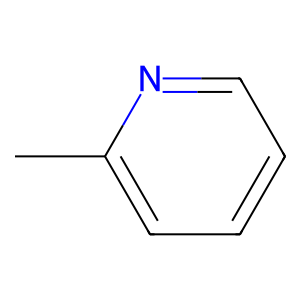

In [3]:
m=Chem.MolFromSmiles('C1=C(C)N=CC=C1')
img=Draw.MolToImage(m)
img

This block converts the 2-D representation into 3-D, and prints a 3-D structure. 

In [4]:
m2=Chem.AddHs(m)
AllChem.EmbedMolecule(m2)
AllChem.MMFFOptimizeMolecule(m2)
mb=Chem.MolToMolBlock(m2)
p=py3Dmol.view(width=400,height=400)
p.addModel(mb,'sdf')
p.setStyle({'stick':{}})
p.setBackgroundColor('0xeeeeee')
p.zoomTo()
p.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

# Practice Problems: 

Part 1: Compute the ionization potential of He(+) in eV, and compare it to the ionization potential of the isoelectronic H atom performed above. Does the difference between the ionization potentials of H vs. He(+) make chemical sense? 

Part 2: Compute the electron affinity of H atom in eV, comparing a deltaSCF calculation to an orbital energy calculation (Chapter 15). Do either of the computed values make chemical sense?  